In [47]:
from random import gauss
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [48]:
current_dir = os.getcwd()
pickle_path = os.path.join(current_dir, 'data')



In [49]:
average_iv_series = pd.read_pickle(os.path.join(pickle_path,'average_iv_series_with_date_nasdaq100.pkl'))


In [50]:
len(average_iv_series)

1258

Text(0.5, 1.0, 'Sp500 historic IV')

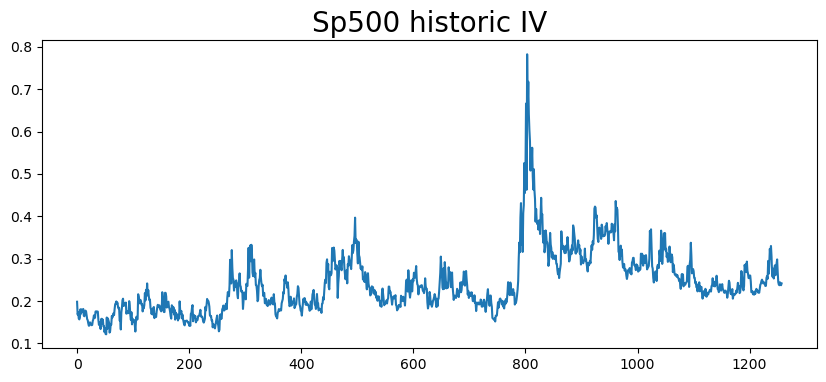

In [51]:
plt.figure(figsize=(10,4))
plt.plot(average_iv_series)
plt.title('Sp500 historic IV', fontsize=20)

# PACF Plot

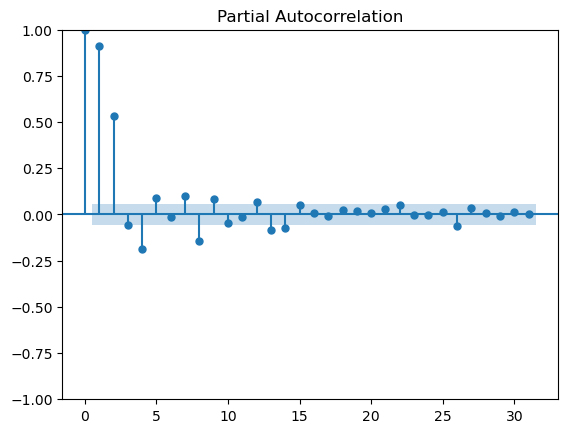

In [52]:
plot_pacf(np.array(average_iv_series)**2)
plt.show()

# Fit the GARCH Model

In [53]:
train, test = 10*average_iv_series[:1100],10*average_iv_series[1100:]

In [58]:
model = arch_model(train, p=2,q=0)

In [59]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 22761.35505816267
Iteration:      2,   Func. Count:     18,   Neg. LLF: 126280.91870607607
Iteration:      3,   Func. Count:     24,   Neg. LLF: 384946.99937947566
Iteration:      4,   Func. Count:     30,   Neg. LLF: 78313.77018887865
Iteration:      5,   Func. Count:     36,   Neg. LLF: 31758.820779788908
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1795.3069026481614
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1621.2723131734504
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1919.6951520391399
Iteration:      9,   Func. Count:     60,   Neg. LLF: 4574.436719621992
Iteration:     10,   Func. Count:     68,   Neg. LLF: 13094.53770048444
Iteration:     11,   Func. Count:     74,   Neg. LLF: 2011.4587735185332
Iteration:     12,   Func. Count:     80,   Neg. LLF: 4310.594040267153
Iteration:     13,   Func. Count:     86,   Neg. LLF: 1356.0738515777439
Iteration:     14,   Func. Count:     92,   Neg. LLF: 20

In [60]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:             average_iv   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -657.769
Distribution:                  Normal   AIC:                           1323.54
Method:            Maximum Likelihood   BIC:                           1343.55
                                        No. Observations:                 1100
Date:                Tue, May 14 2024   Df Residuals:                     1099
Time:                        19:06:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.9806  1.440e-02    137.569      0.000 [  1.952,  2.009]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0121  2.061e-03      5.869  4.387e-09 [8.056e-03,1.614e-02]
alpha[1]       0.8413  5.961e-02     14.114  3.104e-45     [  0.724,  0.958]
alpha[2]       0.1587  4.884e-02      3.250  1.156e-03   [6.299e-02,  0.254]
============================================================================

Covariance estimator: robust
"""

# Predict

# Rolling Forecast Origin

In [65]:
rolling_window_size = 252  # One year of daily data (assuming 252 trading days in a year)
rolling_forecasts = []

for start in range(len(average_iv_series) - rolling_window_size):
    end = start + rolling_window_size
    window_data = average_iv_series[start:end]
    model = arch_model(window_data, vol='Garch', p=1, q=1)
    garch_fit = model.fit(disp='off')
    forecast = garch_fit.forecast(horizon=forecast_horizon).variance.iloc[-1]
    rolling_forecasts.append(forecast)

# Convert rolling forecasts to a DataFrame
rolling_forecasts_df = pd.DataFrame(rolling_forecasts, index=iv_series_diff.index[rolling_window_size:])


C:\Users\Ahmed\miniconda3\envs\myenv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004703. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


NameError: name 'forecast_horizon' is not defined